# Air Flight Price Prediction :

**Features included in Dataset given below :**

1. Airline         : Names of the companies, that provide Airplane services.
2. Source          : Source Airport.
3. Destination     : Destination Airport.
4. Date_of_Journey : Date of journey by a Passenger.
5. Route           : route of the air flight from source to destination.
6. Dep_Time        : Departure time of the flight from Source air port.
7. Arrival_Time    : Arrival time of the flight to Destination air port.
8. Total_Stops     : number stops b/w source & destination airports.
9. Duration        : Time taken or journey time from source to destination.
10. AdditionalInfo : addition info like ood availability.
11. Price          : of the ticket.

## Data Mining :

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
train_df = pd.read_excel('Data_Train.xlsx')
test_df = pd.read_excel('Test_set.xlsx')

In [142]:
pd.set_option('display.max_columns', None)

In [143]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [144]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [145]:
train_df[train_df['Route'].isna() == True] ## Nan values

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [146]:
train_df.shape

(10683, 11)

In [147]:
train_df.isna().sum()  ## checking Nan Values.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [148]:
train_df.dropna(inplace=True)  ## droppinga nan.

In [149]:
train_df.shape

(10682, 11)

In [150]:
train_df[train_df['Route'].isna() == True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [151]:
train_df.isna().sum()  ## no nan values.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [152]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [153]:
# we've to split the date of journey as date & month
# year is only one, so it is not needed to take in to consider
# pd.to_datetime is used to separate values as date & time

train_df['Jrny_day'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y').dt.day
train_df['Jrny_month'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y').dt.month

train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jrny_day,Jrny_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [154]:
train_df.drop('Date_of_Journey', inplace=True, axis=1)

In [155]:
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Jrny_day',
       'Jrny_month'],
      dtype='object')

In [156]:
# Dep_Time has hours & Mins 
# which can be splitted using datetime functionality

train_df['Dep_time_hrs'] = pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_Time_mins'] = pd.to_datetime(train_df['Dep_Time']).dt.minute

In [157]:
train_df.drop('Dep_Time', axis=1, inplace=True)

In [158]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [159]:
# Arrival_Time
# it is unlike dep_time
# we'e to takecare to clean str so that we get only numbers to pour data. 

In [160]:
train_df['Arr_hrs'] = pd.to_datetime(train_df['Arrival_Time']).dt.hour
train_df['Arr_mins'] = pd.to_datetime(train_df['Arrival_Time']).dt.minute

In [161]:
train_df.drop('Arrival_Time', axis=1, inplace=True)

In [162]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [45]:
# duration = list(train_df['Duration'])
# duration


In [163]:
# time taken by the flight to reach from source to destination is called Duration.
# similarly like Arr_time or Dep_time
# duration is also known as Dep_time - Arr_time

duration = list(train_df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

In [164]:
# duration[:10]

In [165]:
duration_hrs = []
duration_mins = []

for i in range(len(duration)):
    duration_hrs.append(duration[i].split(sep='h')[0])
    duration_mins.append(duration[i].split(sep='m')[0].split()[1])

In [166]:
duration_hrs[:10], duration_mins[:10]

(['2', '7', '19', '5', '4', '2', '15', '21', '25', '7'],
 ['50', '25', '0', '25', '45', '25', '30', '5', '30', '50'])

In [167]:
train_df['duration_hrs'] = duration_hrs
train_df['duration_mins'] = duration_mins

In [168]:
train_df.drop('Duration', axis=1, inplace=True)

In [169]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorial Data :

* **Nominal Data : Categorial Data not in order. ---> OneHotEncoder**  
* **Ordinal Data : Categorial Data in Order or on Ranking Basis.---> LabelEncoder**

In [170]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [171]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [183]:
# help(sns.catplot)

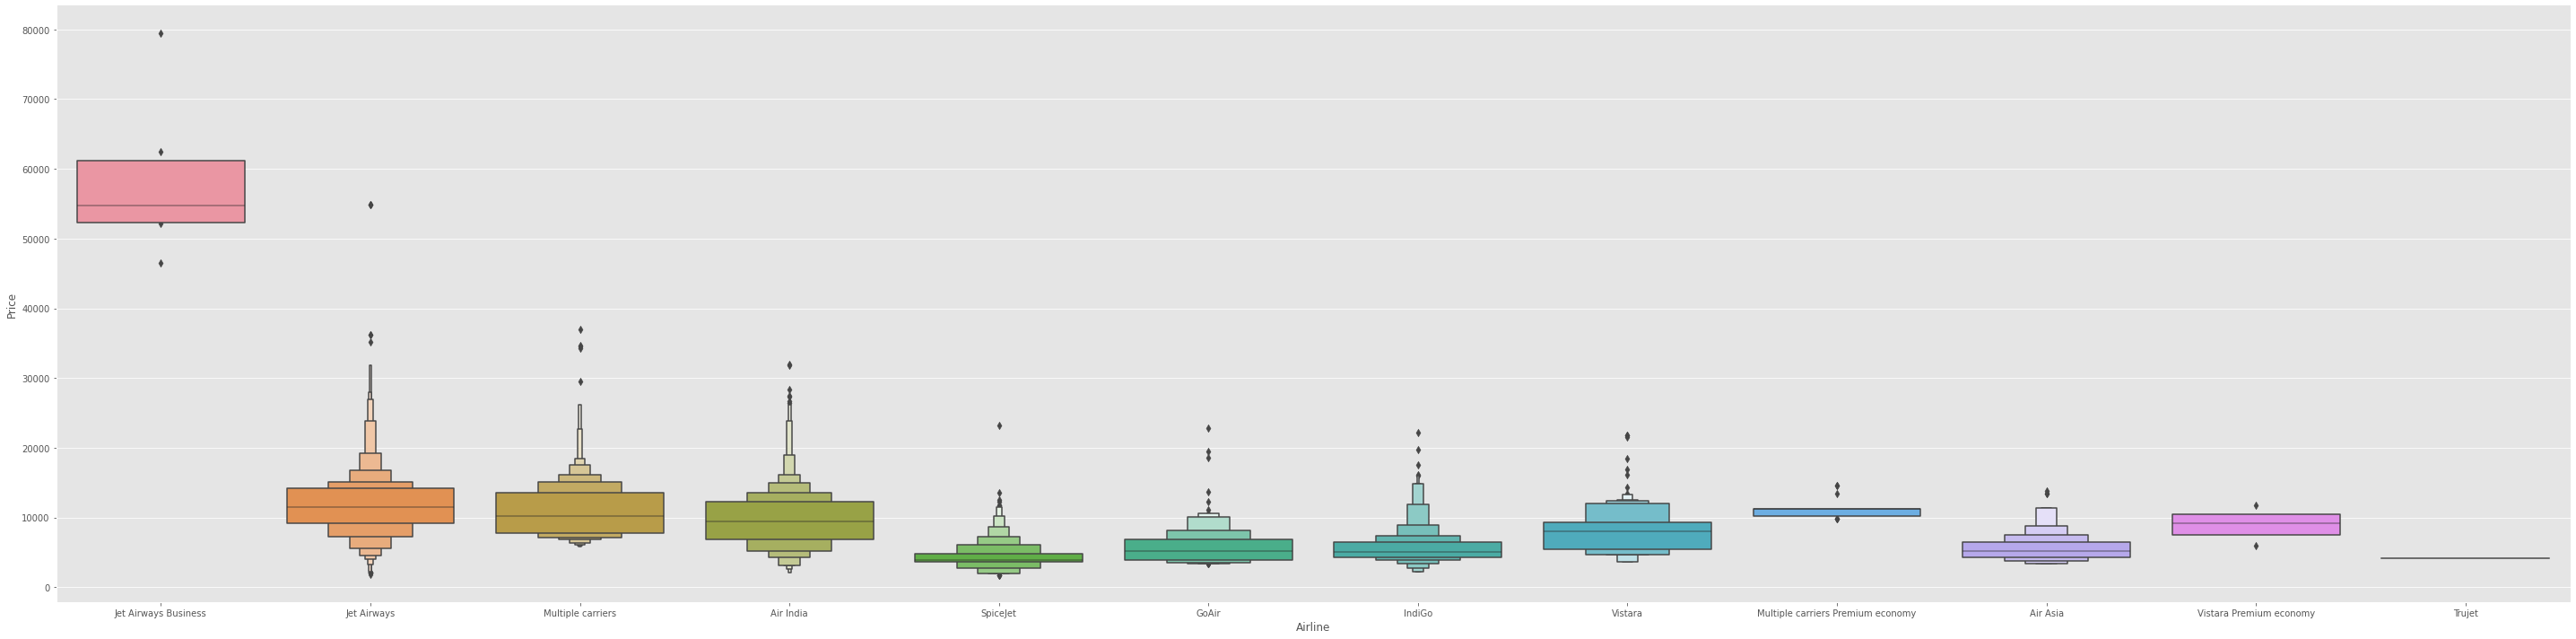

In [188]:
## Visualizing the data wrt. Airlines vs Price
## using Cat plot
plt.style.use('ggplot')
sns.catplot(data=train_df.sort_values('Price', ascending=False), x='Airline', y='Price', height=10, aspect=4, kind='boxen');

In [201]:
# replacing the categorial values of Airline with OneHotEncoding

Airline = train_df[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [202]:
train_df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [204]:
train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

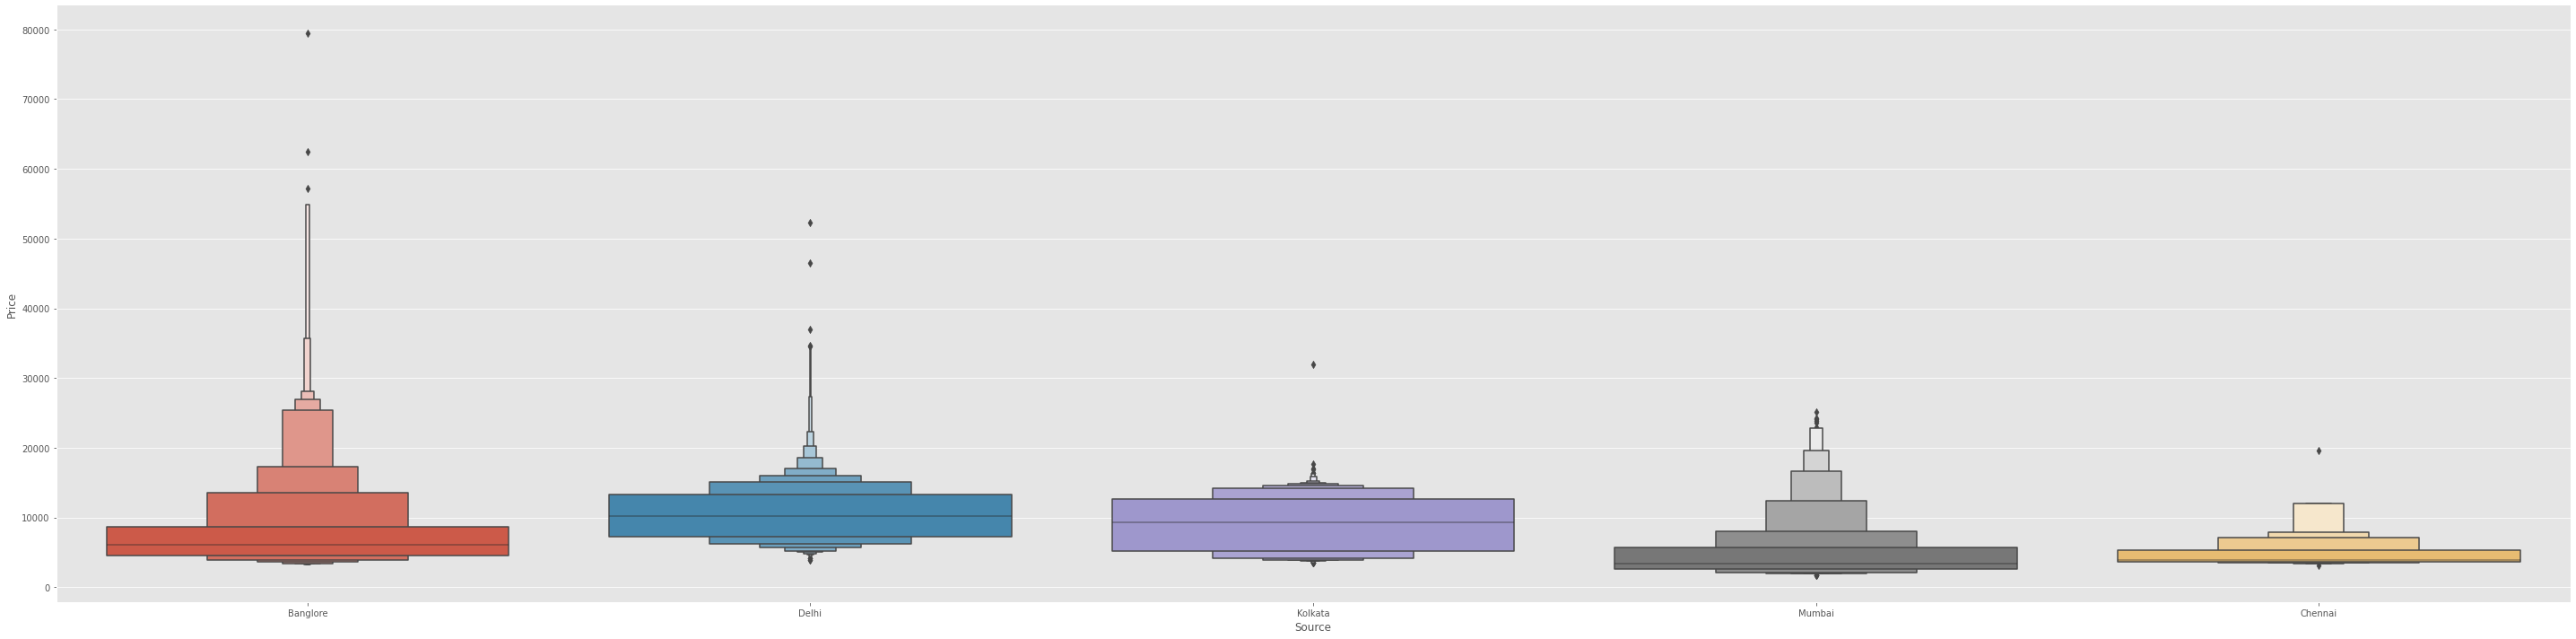

In [206]:
# plotting to visualize the price wrt. sources

sns.catplot(data=train_df.sort_values('Price', ascending=False), x='Source', y='Price', kind='boxen', height=10, aspect=4);

In [218]:
# sns.boxplot(data=train_df, y='Price', x='Source')

In [216]:
# since the sources are categorial & not greather or lesser than one another i,e. Nominal category
# so we use onehot encoding

Source = train_df[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


* Bangalore is taken as 0 as onehot encode value & then removed with drop_first.

In [219]:
train_df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [238]:
# Destination 

train_df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [239]:
# Destination is nominal Category, hence we perform onehot encoding.

Destination = train_df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [226]:
train_df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [228]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [229]:
train_df[train_df['Total_Stops'] == '4 stops']

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins,duration_hrs,duration_mins
9182,Air India,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,4 stops,Change airports,17686,1,3,5,50,11,20,29,30


In [231]:
train_df[train_df['Total_Stops'] == '3 stops'][4:8]


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins,duration_hrs,duration_mins
2172,Air India,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,3 stops,No info,10703,18,5,5,15,19,15,38,0
2623,Air India,Mumbai,Hyderabad,BOM → JDH → JAI → DEL → HYD,3 stops,No info,18293,12,3,9,40,15,15,29,35
2633,Multiple carriers,Delhi,Cochin,DEL → GWL → IDR → BOM → COK,3 stops,No info,21829,6,3,11,35,21,0,9,25
2718,Air India,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,3 stops,No info,15586,9,3,5,15,19,15,38,0


In [232]:
train_df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [234]:
# Route & Total stops are related to each other, in implies same meaning
# 80% of the Additional INf is No info, so we will drop this feature.

In [241]:
# Both Route & Additional Info will be droped now.
train_df.drop(['Route', 'Additional_Info'], inplace=True, axis=1)

In [242]:
train_df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25


In [245]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [246]:
# total stops
# total stops are ordinal categorial, i,e they are in Order
# we use labelencoder

train_df.replace({'non-stop':0, '1 stop':1 , '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [247]:
train_df['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [248]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [252]:
# concatenating dataframe ----> train_df + Airline + Source + Destination.Destination_Cochin

train_df1 = pd.concat([train_df, Airline, Source, Destination], axis=1)

In [253]:
train_df1.head()

,Airline,Source,Destination,Total_Stops,Price,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins,duration_hrs,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [254]:
train_df1.drop(['Airline', 'Source', 'Destination'], inplace=True, axis=1)

In [255]:
train_df1.head()

,Total_Stops,Price,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins,duration_hrs,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [256]:
train_df1.shape

(10682, 30)

# Test Data :

In [273]:
test_df = pd.read_excel('Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [274]:
# test_df.tail()

## Test Data Preproccessing :

#### Checking Nan Values :

In [275]:
test_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [276]:
# no Nan Values

#### Date of Journey Preproccessing :

In [277]:
test_df['Jrny_day'] = pd.to_datetime(test_df['Date_of_Journey'], format='%d/%m/%Y').dt.day
test_df['Jrny_month'] = pd.to_datetime(test_df['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [278]:
test_df.drop('Date_of_Journey', axis=1, inplace=True)

In [279]:
test_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Jrny_day,Jrny_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


#### Dep_time preproccessing :

In [280]:
# Dep time
test_df['Dep_Time'].count()

2671

In [281]:
test_df['Dep_time_hrs'] = pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_Time_mins'] = pd.to_datetime(test_df['Dep_Time']).dt.minute

In [282]:
test_df.drop('Dep_Time', axis=1, inplace=True)

In [283]:
test_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


#### Arrival_Time preproccessing :

In [285]:
train_df1.head()

,Total_Stops,Price,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins,duration_hrs,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [286]:
# Arrival_Time

test_df['Arr_hrs'] = pd.to_datetime(test_df['Arrival_Time']).dt.hour
test_df['Arr_mins'] = pd.to_datetime(test_df['Arrival_Time']).dt.minute

In [287]:
test_df.drop('Arrival_Time', axis=1, inplace=True)

In [288]:
test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [289]:
duration = list(test_df['Duration'])

In [291]:
duration[:10]

['10h 55m',
 '4h',
 '23h 45m',
 '13h',
 '2h 50m',
 '18h 20m',
 '15h 5m',
 '5h 15m',
 '2h 45m',
 '6h 5m']

In [304]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

In [305]:
duration[:10]

['10h 55m',
 '4h 0m',
 '23h 45m',
 '13h 0m',
 '2h 50m',
 '18h 20m',
 '15h 5m',
 '5h 15m',
 '2h 45m',
 '6h 5m']

In [307]:
duration_hrs = []
duration_mins = []

for i in range(len(duration)):
    duration_hrs.append(duration[i].split(sep='h')[0])
    duration_mins.append(duration[i].split(sep='m')[0].split()[1])

In [309]:
duration_mins[:10]

['55', '0', '45', '0', '50', '20', '5', '15', '45', '5']

In [310]:
test_df['duration_hrs'] = duration_hrs
test_df['duration_mins'] = duration_mins

In [312]:
test_df.drop('Duration', axis=1, inplace=True)

In [313]:
test_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins,duration_hrs,duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


### Remaining Features are categorial features :

In [314]:
## Nominal Category  ---> onehot
## Ordinal Category  ---> Label encoder

#### Source :

In [315]:
test_df.Source.value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [317]:
# onehot encoding for source :

Source = test_df[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


#### Destination :

In [319]:
Destination = test_df[['Destination']]

Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


#### Airline :

In [320]:
Airline = test_df[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [321]:
test_df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins,duration_hrs,duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0


#### Route & Additional_Info :

In [322]:
## Route & Total_stops are related to eachother.
## Additional info have 80% no info data :

test_df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

#### Total_Stops : 

In [330]:
test_df['Total_Stops'].value_counts()

1    1431
0     849
2     379
3      11
4       1
Name: Total_Stops, dtype: int64

In [328]:
# train_df1.head(1)

In [329]:
# Total_Stops
# it is ordinal, so we go with label encoder

test_df.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops': 4}, inplace=True)

In [331]:
test_df.head(1)

,Airline,Source,Destination,Total_Stops,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins,duration_hrs,duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55


In [332]:
# concatenating all the features :

test_df1 = pd.concat([test_df, Airline, Source, Destination], axis=1)

In [334]:
test_df1.head(2)

,Airline,Source,Destination,Total_Stops,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins,duration_hrs,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [335]:
# droping the categorial features

test_df1.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [337]:
test_df1.head(2)

,Total_Stops,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins,duration_hrs,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# **Feature Selection :**  

1. heatmap
2. feature importance
3. selectKBest

In [345]:
test_df1.keys()

Index(['Total_Stops', 'Jrny_day', 'Jrny_month', 'Dep_time_hrs',
       'Dep_Time_mins', 'Arr_hrs', 'Arr_mins', 'duration_hrs', 'duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [341]:
train_df1.keys()

Index(['Total_Stops', 'Price', 'Jrny_day', 'Jrny_month', 'Dep_time_hrs',
       'Dep_Time_mins', 'Arr_hrs', 'Arr_mins', 'duration_hrs', 'duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [350]:
X = train_df1.loc[:, ['Total_Stops', 'Jrny_day', 'Jrny_month', 'Dep_time_hrs',
       'Dep_Time_mins', 'Arr_hrs', 'Arr_mins', 'duration_hrs', 'duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]

y = train_df1.loc[:, 'Price']

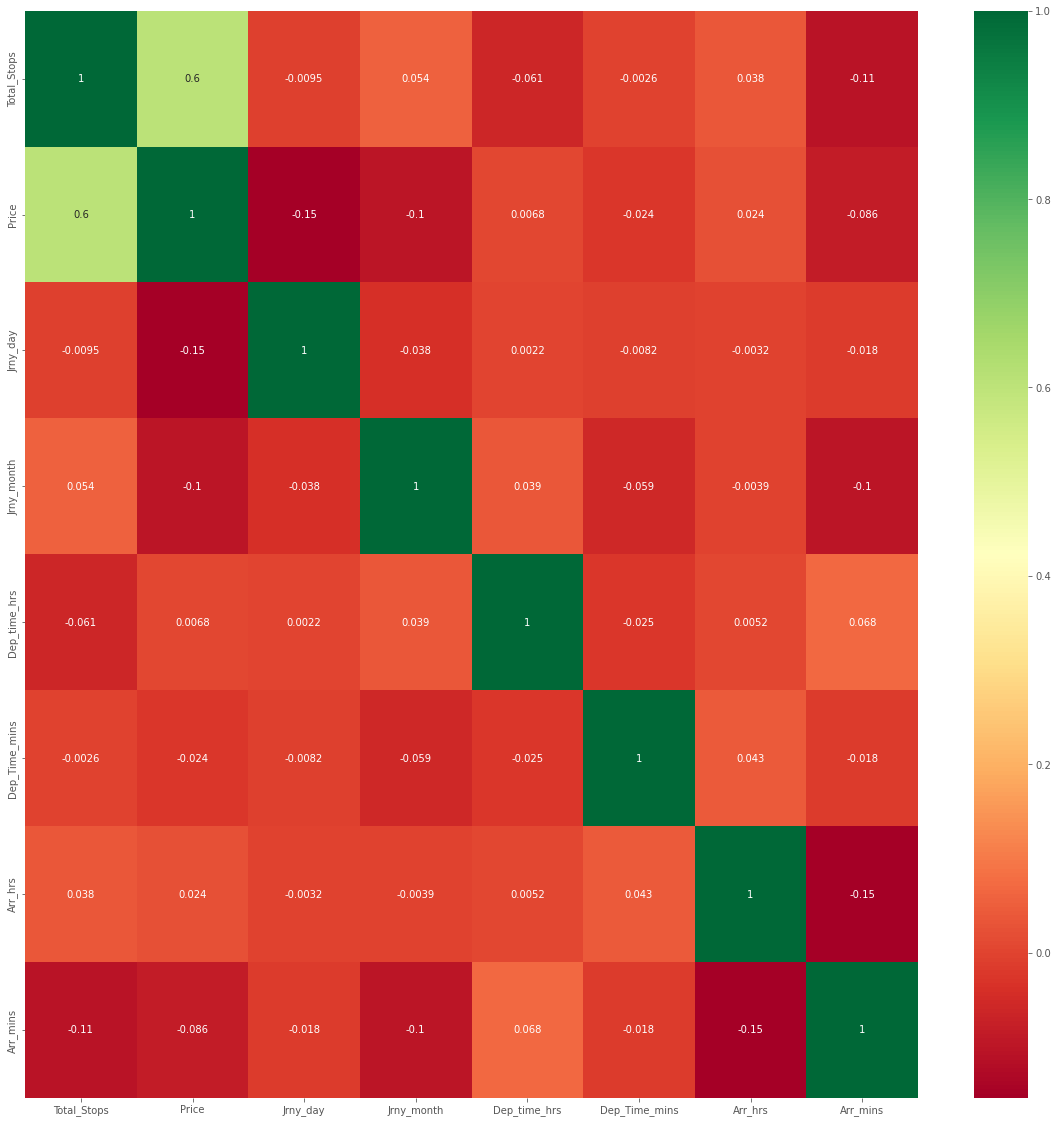

In [356]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn');

In [359]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [363]:
print(selection.feature_importances_)

[2.23613989e-01 1.44851918e-01 5.22175865e-02 2.35324784e-02
 2.16738873e-02 2.78054587e-02 1.88122046e-02 1.28116794e-01
 1.78611078e-02 8.93640651e-03 1.90611270e-03 1.78855660e-02
 1.35947407e-01 6.74661816e-02 1.90902847e-02 8.20662860e-04
 2.95044374e-03 5.08486553e-03 8.89494483e-05 6.07737726e-04
 9.46485431e-03 3.09254729e-03 6.31168464e-03 1.16524226e-02
 1.73080520e-02 7.59011048e-03 4.40248344e-04 2.48700383e-02]


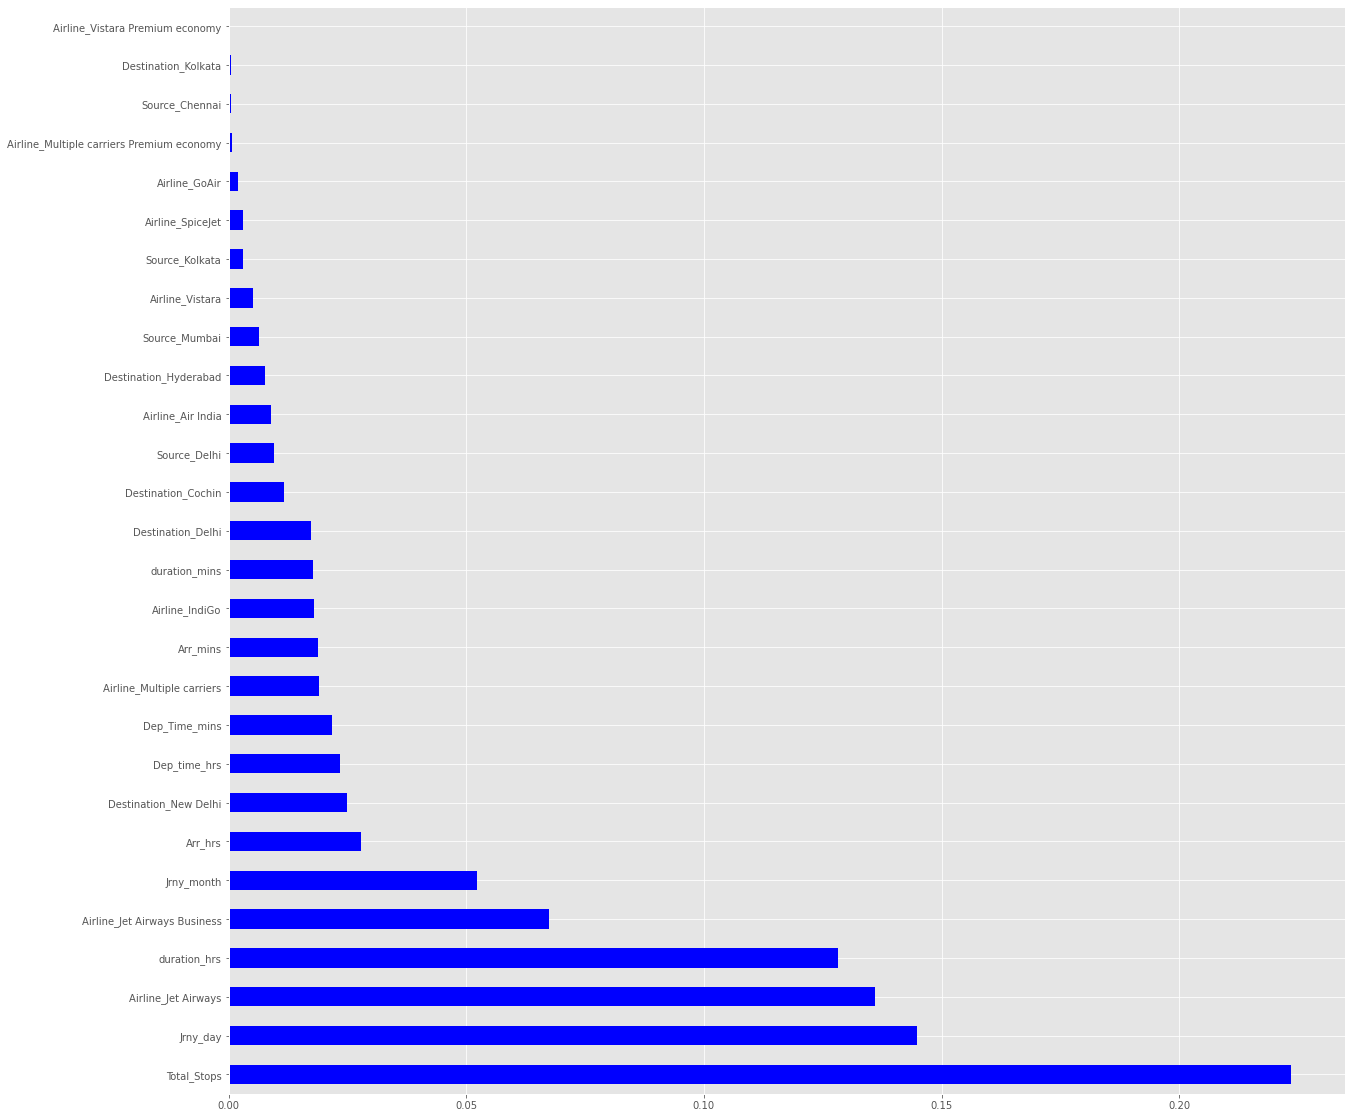

In [368]:
#plot graph of feature importances for better visualization

plt.figure(figsize=(20, 20))
feat_import = pd.Series(selection.feature_importances_, index=X.columns)
feat_import.nlargest(30).plot(kind='barh', color='blue');

## Fitting model using Random Forest :

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
3. Scaling is not done in Random forest
4. Import model
5. Fit the data
6. Predict w.r.t X_test
7. In regression check RSME Score
8. Plot graph

In [369]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [370]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [371]:
y_pred = reg_rf.predict(X_test)

In [372]:

reg_rf.score(X_train, y_train)

0.9534875528008444

In [373]:
reg_rf.score(X_test, y_test)

0.7975369938592282

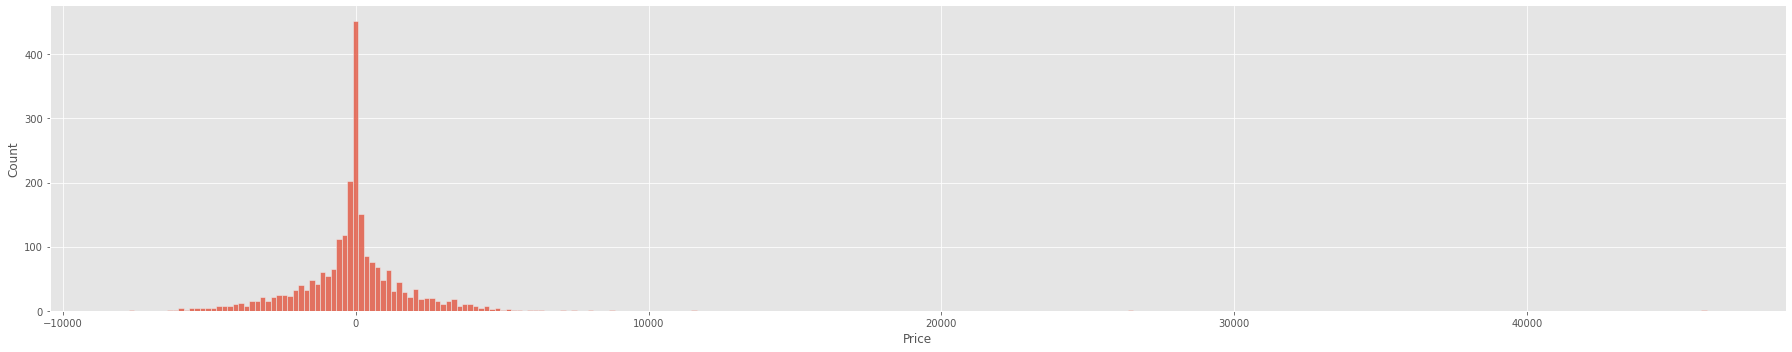

In [378]:
sns.displot(y_test - y_pred, aspect=5, height=5)
plt.show();

C:\Users\RRR\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


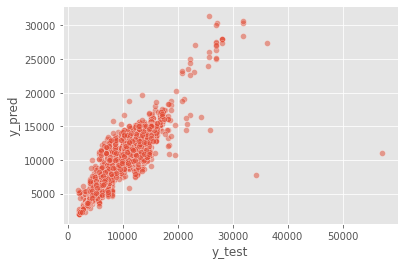

In [382]:
sns.scatterplot(y_test, y_pred, alpha=.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show();

In [383]:
from sklearn import metrics 

In [384]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1176.239764635301
MSE: 4294874.238844833
RMSE: 2072.4078360315166


In [385]:
metrics.r2_score(y_test, y_pred)

0.7975369938592282

## Hyperparameter Tuning :

* Choose following method for hyperparameter tuning
*        RandomizedSearchCV --> Fast
*        GridSearchCV
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [401]:
from sklearn.model_selection import RandomizedSearchCV

In [402]:
# randomized search cv

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# number of feaures to consider at every split
max_features = ['auto', 'sqrt']

# max num of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

# min number of samples to split a node
min_samples_split = [2, 5, 10, 15, 50, 100]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [403]:
# create the random grid

random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf}

In [404]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [405]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=  15.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=  13.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=  14.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=  13.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=  13.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=  22.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=  23.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estim

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [406]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [407]:
prediction = rf_random.predict(X_test)

C:\Users\RRR\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


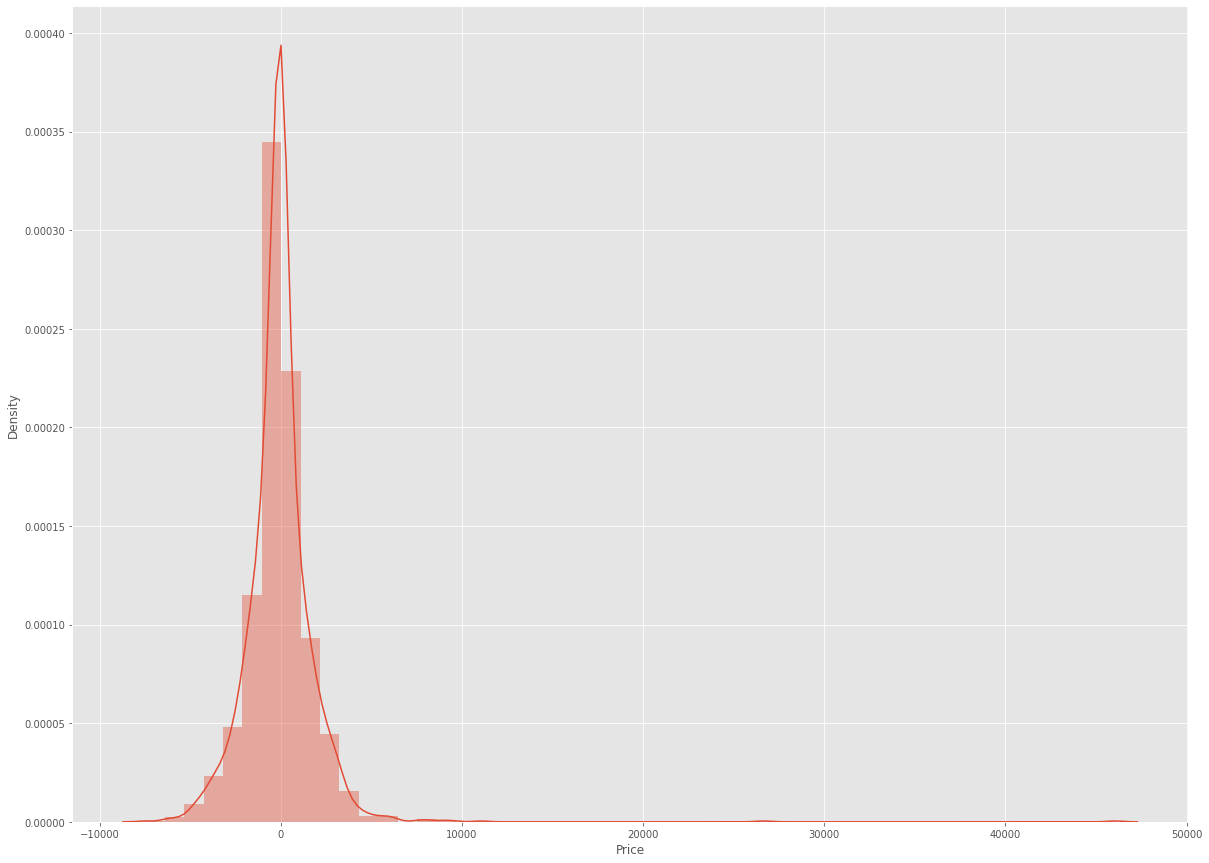

In [414]:
plt.figure(figsize=(20, 15))
sns.distplot(y_test - prediction)
plt.show();

C:\Users\RRR\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


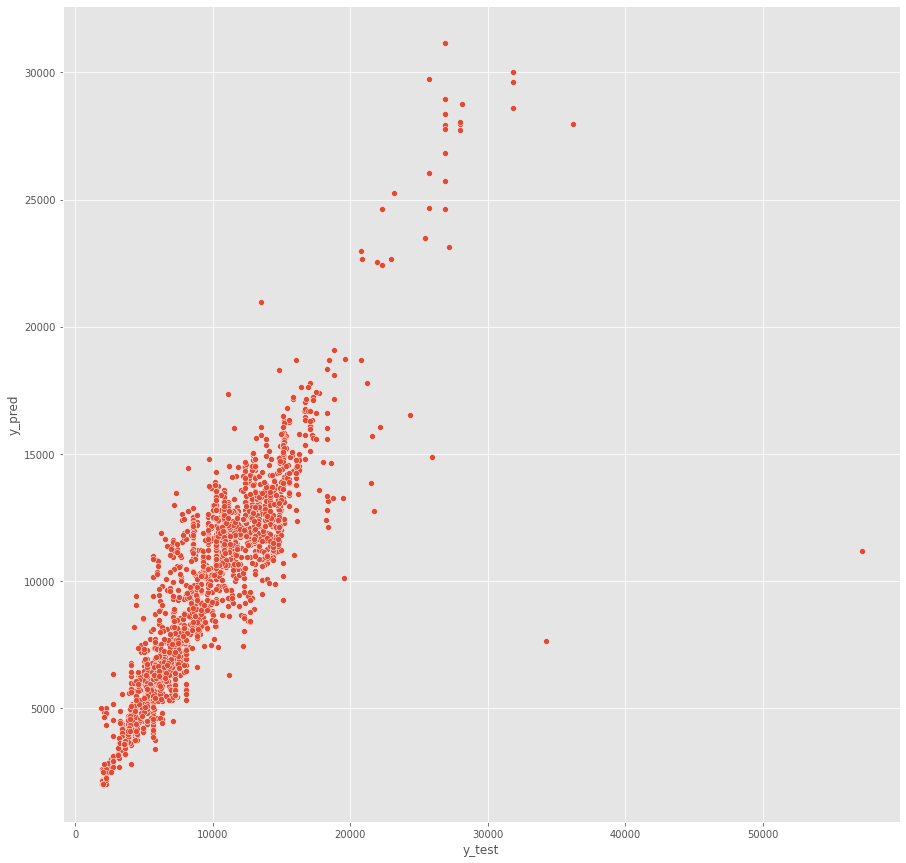

In [417]:
plt.figure(figsize=(15, 15))
sns.scatterplot(y_test, prediction)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show();

In [418]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1128.3686627409904
MSE: 3850256.5198758934
RMSE: 1962.2070532632108


In [421]:
metrics.r2_score(y_test, prediction)

0.8184965458646709

# Save the Model to Reuse again :

In [430]:
import pickle

# open the file wehre we want to store data
file = open('flight_rf.pkl', 'wb')

# dump info to that file
pickle.dump(rf_random, file)

In [431]:
model = open('flight_rf.pkl', 'rb')
forest = pickle.load(model)

In [432]:
y_prediction = forest.predict(X_test)

In [434]:
metrics.r2_score(y_test, y_prediction)

0.8184965458646709

# **Test_data :**

In [437]:
test_df1.head()

,Total_Stops,Jrny_day,Jrny_month,Dep_time_hrs,Dep_Time_mins,Arr_hrs,Arr_mins,duration_hrs,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [440]:
X_test_df = test_df1.copy()

In [1]:
X_test_df.head()

NameError: name 'X_test_df' is not defined

In [443]:
y_test_pred = rf_random.predict(X_test_df)

In [445]:
y_test_pred[:10]

array([11745.20842061,  4228.76732158, 14777.54577571, 11343.59795866,
        3953.98288603, 10514.75476022, 11426.34690204,  5878.15851032,
        4411.7456288 , 13047.28952529])

In [447]:
prediction[:10]

array([16689.15549339,  5439.48978746,  8709.80632147,  3705.48695355,
       14735.44344617,  9782.34968745, 13767.06277719,  6105.36323255,
       13576.86683879, 14446.57420494])

In [457]:
# checking RSME

# print(np.sqrt(metrics.mean_squared_error(prediction, y_test_pred)))

In [454]:
y_test_pred.shape, y_pred.shape

((2671,), (2351,))

In [456]:
X_test_df.shape

(2671, 28)

In [458]:
y_test_pred1 = y_test_pred[:2351]

In [459]:
y_test_pred1.shape, y_test.shape

((2351,), (2351,))

In [461]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred1)))

6282.896385753595


In [ ]:
metrics.r2_score(prediction, y_test_pred1)

-1.0403519836405595